In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import time

In [3]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (16,8)

Output()

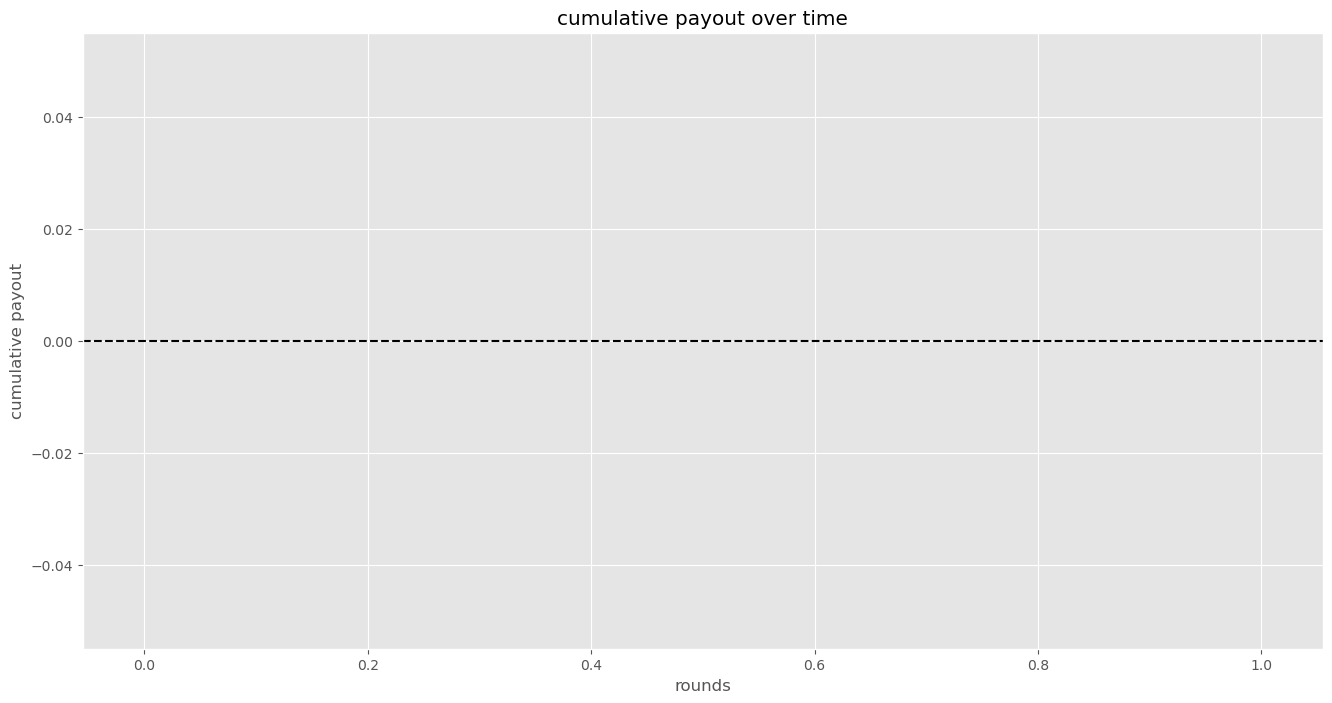

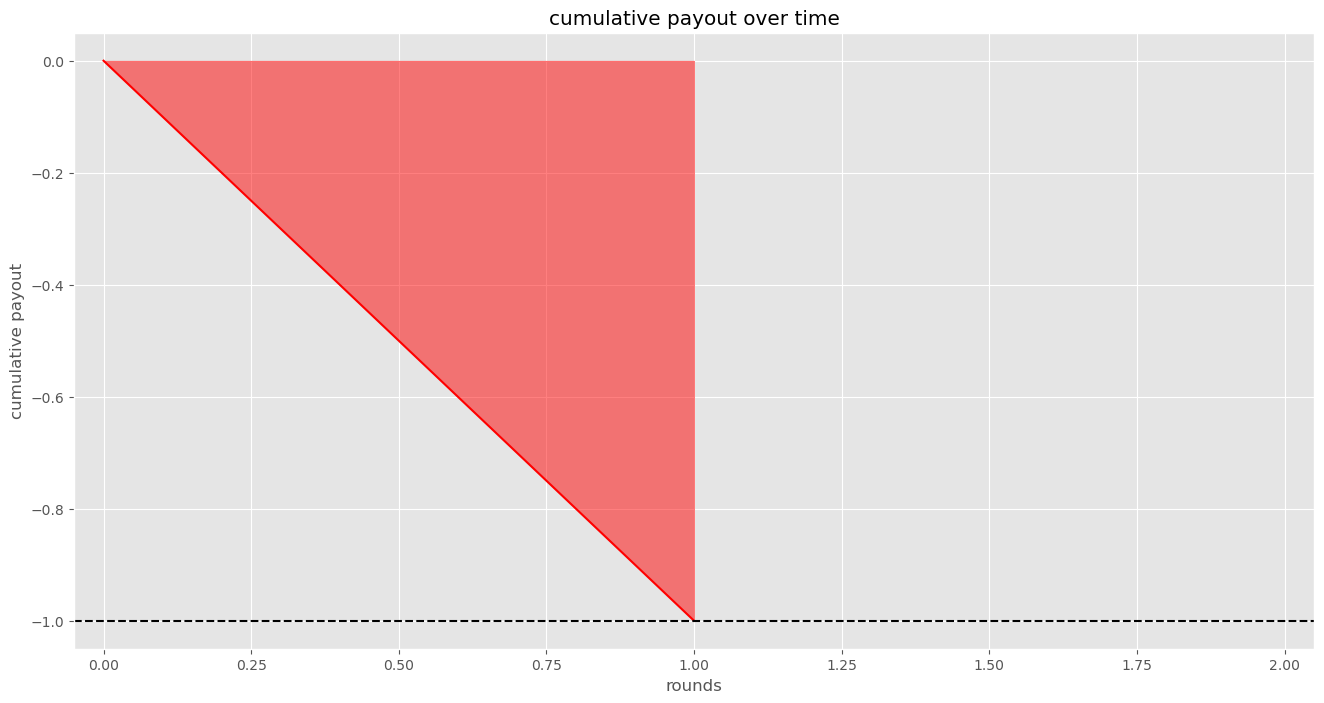

In [36]:
%run cards.ipynb
%run game.ipynb
%run visualization.ipynb
d = Visualization()